In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [24]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(15, 5))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('XGBoost Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('EUNG Returns')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

In [4]:
df = pd.read_excel("Renamed Columns Stationary Data/EUNG.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,EUNG,EUNG_LAG1,EUNG_LAG2,EUNG_LAG3,EUNG_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.000000,0.003724,-0.018485,-0.014546,0.029306,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.088868,0.000000,0.003724,-0.018485,-0.014546,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,-0.013699,0.088868,0.000000,0.003724,-0.018485,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.060409,-0.013699,0.088868,0.000000,0.003724,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.048790,-0.060409,-0.013699,0.088868,0.000000,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.646442,-0.044776,0.021344,0.636412,0.631536,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.730063,0.646442,-0.044776,0.021344,0.636412,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.520405,-0.730063,0.646442,-0.044776,0.021344,0.015792,1.58,1.38,0.005921,1,1


In [5]:
y = df['EUNG']
X = df[["EUNG_LAG1","EUNG_LAG2","EUNG_LAG3","EUNG_LAG4","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   EUNG   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     5.016
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.44e-05
Time:                        18:54:26   Log-Likelihood:                 33.156
No. Observations:                 109   AIC:                            -46.31
Df Residuals:                      99   BIC:                            -19.40
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [6]:
selected_columns = ["EUNG","EUNG_LAG1","Infectious Disease Tracker","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,EUNG,EUNG_LAG1,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,
1996-07-01,0.000000,0.003724,-0.196710,0,0
1996-10-01,0.088868,0.000000,0.083382,0,0
1997-01-01,-0.013699,0.088868,-0.446287,0,0
1997-04-01,-0.060409,-0.013699,0.782759,0,0
1997-07-01,-0.048790,-0.060409,0.041964,0,0
...,...,...,...,...,...
2022-07-01,0.646442,-0.044776,-0.083527,1,1
2022-10-01,-0.730063,0.646442,-0.269102,1,1
2023-01-01,-0.520405,-0.730063,0.005921,1,1


In [7]:
# Splitting the dataset
train_df = pruned_df.iloc[:-8]
test_df = pruned_df.iloc[-8:]


In [8]:
# Separate the target variable and the features
X_train = train_df[["EUNG_LAG1","Infectious Disease Tracker","COV19","RUWAR"]]
y_train = train_df["EUNG"]

X_test = test_df[["EUNG_LAG1","Infectious Disease Tracker","COV19","RUWAR"]]
y_test = test_df["EUNG"]

In [9]:
# Define the parameter grid
param_grid = {
    'max_depth': [2,3],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [200, 250],
    'subsample': [0.3, 0.5],
    'colsample_bytree': [0.7, 0.9],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [1, 1.5]
}

# Create the model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

{'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 250, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.5}


In [10]:
results = pd.DataFrame({'y_test': y_test, 'predictions': predictions})

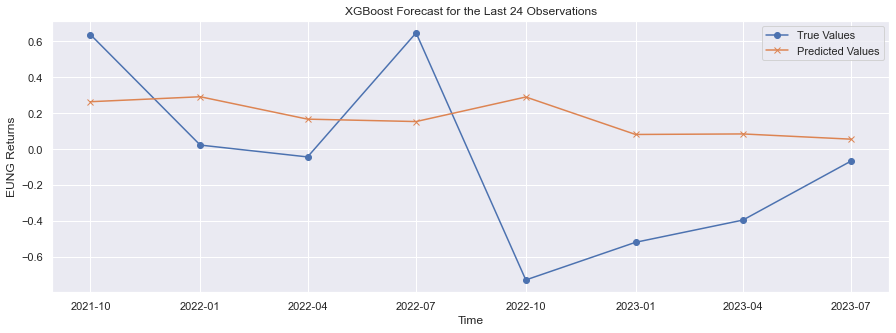

In [25]:
plotFor(results.y_test, results.predictions)

In [12]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.4460
MAPE: 302.9604 %
MSE: 0.2681
RMSE: 0.5178


## Saving Prediction

In [13]:
df = pd.DataFrame({'EUNG Q XG': predictions, 'Actual': y_test})
df.to_excel("EUNG_Q_XG_forecast.xlsx", index=True)
df

,EUNG Q XG,Actual
DATE,,
2021-10-01,0.262837,0.636412
2022-01-01,0.290538,0.021344
2022-04-01,0.165752,-0.044776
2022-07-01,0.152310,0.646442
2022-10-01,0.289092,-0.730063
2023-01-01,0.080378,-0.520405
2023-04-01,0.083330,-0.396592
2023-07-01,0.054068,-0.066661


In [14]:
# Open a file in write mode
with open('EUNG Q XG Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')

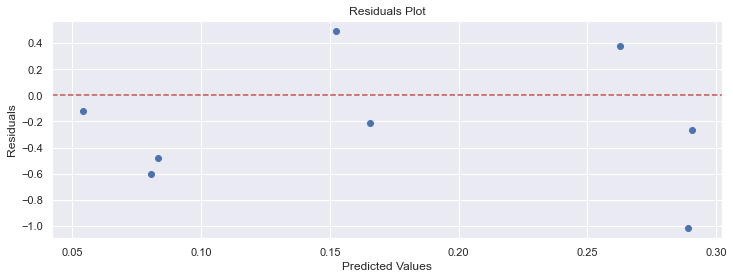

In [15]:
res = y_test - predictions

plt.figure(figsize=(12, 4))
plt.scatter(predictions, res)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

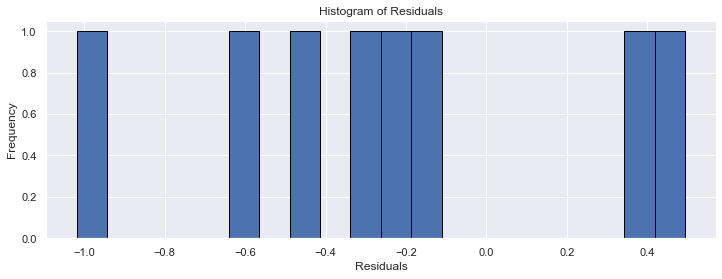

In [16]:
plt.figure(figsize=(12, 4))
plt.hist(res, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

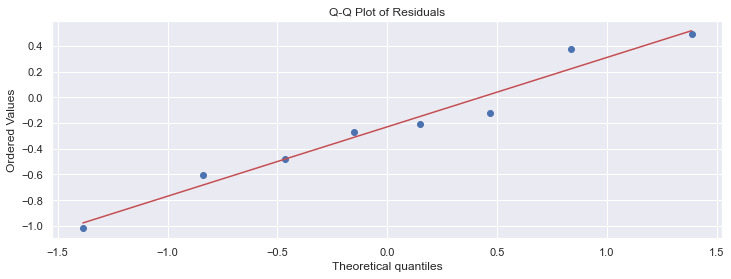

In [17]:
import scipy.stats as stats
plt.figure(figsize=(12, 4))
stats.probplot(res, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

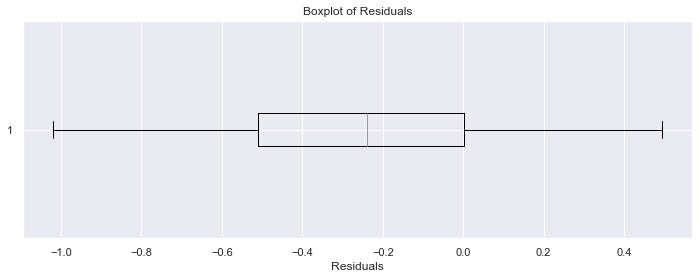

In [18]:
plt.figure(figsize=(12, 4))
plt.boxplot(res, vert=False)
plt.title('Boxplot of Residuals')
plt.xlabel('Residuals')
plt.show()

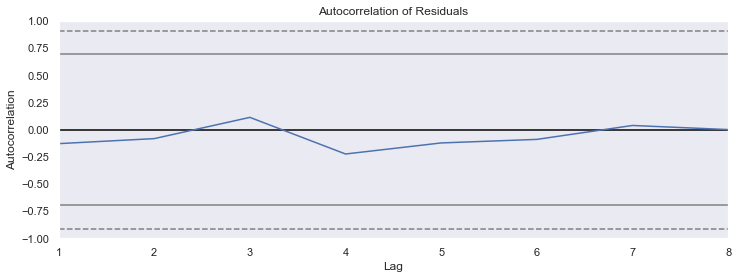

In [19]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12, 4))
autocorrelation_plot(res)
plt.title('Autocorrelation of Residuals')
plt.show()